# **Implementasi Algoritma K-Nearest Neighbor (KNN) Untuk Klasifikasi Seleksi Penerima Beasiswa**







**Deskripsi Kasus dan Permasalahan Dataset**

Pada kasus ini membahas mengenai implementasi algoritma K-Nearest Neighbor (KNN) untuk klasifikasi seleksi penerima beasiswa. Dataset yang digunakan diambil dari kaggle pada link berikut "https://www.kaggle.com/datasets/hilmanabdurrohimazis/1000-dataset-beasiswa?resource=download", dataset tersebut berisi data atau informasi siswa yang untuk memutuskan siswa tersebut ditolak atau diterima beasiswa, adapun beberapa faktor  yang mempengaruhi diantaranya kemampuan akademik, prestasi, dan faktor ekonomi.

Sedangkan permasalahan yang terdapat pada dataset tersebut diantaranya:
1.   Adanya variabel yang tidak berpengaruh terhadap keputusan beasiswa (misalnya, jarak tempat tinggal, sks, jenis kelamin, dan sebagainya).
2.   Tidak adanya batas/syarat/ketentuan dalam keputusan pemilihan beasiswa.

Solusi untuk mengatasi permasalahan diatas:
1.   Menghapus variabel yang tidak diperlukan
2.   Membuat syarat/ketentuan menggunakan Algoritma KNN

**Daftar Isi**
1. Pendahuluan

 1.1 K-Nearest Neighbor

 1.2 Penjelasan Dataset
2. Dataset

 2.1 Import dan Pengecekan Dataset

 2.2 Analisis Dataset

 2.3 Preprocessing Data

 2.4 Modelling dan Evaluasi Data (Akurasi)
3. Penutup

# **1. Pendahuluan**


**1.1 K-Nearest Neighbor**

**Pengertian:**

K-Nearest Neighbor (KNN) adalah sebuah algoritma klasifikasi yang digunakan untuk memprediksi suatu data berdasarkan data-data yang telah dikategorikan sebelumnya. Algoritma ini dikembangkan oleh Evelyn Fix dan Joseph Hodges pada tahun 1951.

**Cara Kerja:**

KNN bekerja dengan cara menemukan k data yang paling dekat dengan data yang akan diklasifikasi, kemudian mengambil kelas yang paling umum di antara mereka. Jika k = 3, maka data tersebut akan diklasifikasi ke kelas yang sama dengan data yang paling dekat.

**1.2 Penjelasan Dataset**

Dalam dataset ini, terdapat variabel sebagai berikut:
*  Nomor
*  Nama Lengkap
- Program Studi
- Jenis Kelamin
- Jarak Tempuh Rumah
- Asal Sekolah
- Tahun Lulus
- SKS
- Ikut Organisasi
- Ikut UKM
- IPK
- Pekerjaan Orang Tua
- Penghasilan Orang Tua
- Tanggungan Orang Tua
- Status Beasiswa

# **2. Dataset**

# **2.1 Import Data dan Pengecekan Data**

Import Library

In [ ]:
# import requirement libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
# for solve problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# optional
import warnings
warnings.filterwarnings('ignore')
plt.style.use('_mpl-gallery')
font = {'fontsize':12, 'fontstyle':'italic', 'backgroundcolor':'black', 'color':'white'} # for plot title

# import from sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV, KFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.naive_bayes import MultinomialNB, ComplementNB, CategoricalNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Import Dataset

In [ ]:
from google.colab import files


# Upload the file
uploaded = files.upload()


Saving 1000 Data Fix (1).csv to 1000 Data Fix (1).csv


Membaca Dataset

In [ ]:
import pandas as pd
import io

# Try different encodings until it works
for filename in uploaded.keys():
    try:
        # Attempt to read the file with utf-8 encoding
        data = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))
        print(f"Successfully read the file with utf-8 encoding")
    except UnicodeDecodeError:
        # If utf-8 fails, try latin1 encoding
        data = pd.read_csv(io.StringIO(uploaded[filename].decode('latin1')))
        print(f"Successfully read the file with latin1 encoding")
    except Exception as e:
        print(f"Failed to read the file with both utf-8 and latin1 encodings: {e}")

print(data)

Successfully read the file with latin1 encoding
          No              Nama Lengkap                              Prodi  \
0        1.0            GALAN PRASETIO  Bimbingan dan Konseling | Reguler   
1        2.0        FINGKY RANDIANSYAH  Bimbingan dan Konseling | Reguler   
2        3.0               ADELIA PANE  Bimbingan dan Konseling | Reguler   
3        4.0               DWI HANDOKO  Bimbingan dan Konseling | Reguler   
4        5.0  DESTRI FERAWANTI GUSTINI  Bimbingan dan Konseling | Reguler   
...      ...                       ...                                ...   
1038  1040.0             Othella Booth          S1 Teknik Mesin | Reguler   
1039  1041.0          Ettie Milnthorpe          S1 Teknik Mesin | Reguler   
1040  1042.0          Patrizia Shermar          S1 Teknik Mesin | Reguler   
1041  1043.0               Otto Collip          S1 Teknik Mesin | Reguler   
1042     NaN                       NaN                                NaN   

     Jenis Kelamin Jarak Te

Menghapus Kolom "Unnamed"

In [ ]:
import pandas as pd

# Misalkan DataFrame Anda bernama df
# Contoh: df = pd.read_csv('path_to_your_file.csv')

# Hapus kolom yang mengandung nama 'Unnamed'
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Tampilkan DataFrame untuk memastikan kolom 'Unnamed: 15' telah dihapus
print(data)


          No              Nama Lengkap                              Prodi  \
0        1.0            GALAN PRASETIO  Bimbingan dan Konseling | Reguler   
1        2.0        FINGKY RANDIANSYAH  Bimbingan dan Konseling | Reguler   
2        3.0               ADELIA PANE  Bimbingan dan Konseling | Reguler   
3        4.0               DWI HANDOKO  Bimbingan dan Konseling | Reguler   
4        5.0  DESTRI FERAWANTI GUSTINI  Bimbingan dan Konseling | Reguler   
...      ...                       ...                                ...   
1038  1040.0             Othella Booth          S1 Teknik Mesin | Reguler   
1039  1041.0          Ettie Milnthorpe          S1 Teknik Mesin | Reguler   
1040  1042.0          Patrizia Shermar          S1 Teknik Mesin | Reguler   
1041  1043.0               Otto Collip          S1 Teknik Mesin | Reguler   
1042     NaN                       NaN                                NaN   

     Jenis Kelamin Jarak Tempat Tinggal kekampus (Km)  \
0                L

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No                                  1042 non-null   float64
 1   Nama Lengkap                        1042 non-null   object 
 2   Prodi                               1042 non-null   object 
 3   Jenis Kelamin                       1042 non-null   object 
 4   Jarak Tempat Tinggal kekampus (Km)  1042 non-null   object 
 5   Asal Sekolah                        1042 non-null   object 
 6   Tahun Lulus                         1042 non-null   float64
 7   SKS                                 1042 non-null   float64
 8   Ikut Organisasi                     1042 non-null   object 
 9   Ikut UKM                            1042 non-null   object 
 10  IPK                                 1042 non-null   float64
 11  Pekerjaan Orang Tua                 1042 no

Menghapus Kolom yang tidak dibutuhkan

In [ ]:
columns_to_drop = ['Prodi', 'Jenis Kelamin', 'Asal Sekolah', 'Tahun Lulus']
data = data.drop(columns=columns_to_drop)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No                                  1042 non-null   float64
 1   Nama Lengkap                        1042 non-null   object 
 2   Jarak Tempat Tinggal kekampus (Km)  1042 non-null   object 
 3   SKS                                 1042 non-null   float64
 4   Ikut Organisasi                     1042 non-null   object 
 5   Ikut UKM                            1042 non-null   object 
 6   IPK                                 1042 non-null   float64
 7   Pekerjaan Orang Tua                 1042 non-null   object 
 8   Penghasilan                         1042 non-null   object 
 9   Tanggungan                          1042 non-null   float64
 10  Status Beasiswa                     1042 non-null   object 
dtypes: float64(4), object(7)
memory usage: 89.8

In [ ]:
# Daftar kolom yang ingin dihapus
columns_to_drop = ['No', 'Jarak Tempat Tinggal kekampus (Km)', 'SKS', 'Tanggungan']

# Memeriksa apakah kolom-kolom tersebut ada di DataFrame dan menghapusnya jika ada
columns_present = [col for col in columns_to_drop if col in data.columns]
data = data.drop(columns=columns_present)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nama                 4 non-null      object 
 1   IPK                  4 non-null      float64
 2   Ikut Organisasi      4 non-null      object 
 3   Ikut UKM             4 non-null      object 
 4   Pekerjaan Orang Tua  4 non-null      object 
 5   Penghasilan          4 non-null      object 
 6   Status Beasiswa      4 non-null      object 
dtypes: float64(1), object(6)
memory usage: 352.0+ bytes


In [ ]:
# Menampilkan jumlah nilai yang hilang di setiap kolom
missing_values = data.isnull().sum()
print(missing_values)

# Menampilkan persentase nilai yang hilang di setiap kolom
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)


Nama                   0
IPK                    0
Ikut Organisasi        0
Ikut UKM               0
Pekerjaan Orang Tua    0
Penghasilan            0
Status Beasiswa        0
dtype: int64
Nama                   0.0
IPK                    0.0
Ikut Organisasi        0.0
Ikut UKM               0.0
Pekerjaan Orang Tua    0.0
Penghasilan            0.0
Status Beasiswa        0.0
dtype: float64


# **2.2 Analisis Dataset**

**Mengubah Data Kategorikal Menjadi Numerik**

Mengubah data kategorikal menjadi numerik adalah proses konversi di mana nilai-nilai dalam suatu variabel yang awalnya berupa kategori atau label, seperti "merah", "biru", dan "hijau", diubah menjadi representasi numerik, misalnya dengan menetapkan angka atau kode tertentu untuk setiap kategori tersebut.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Contoh data
data = pd.DataFrame({
    'Ikut Organisasi': ['Ya', 'Tidak', 'Ya'],
    'Ikut UKM': ['Tidak', 'Ya', 'Tidak'],
    'Pekerjaan Orang Tua': ['Pegawai', 'Wiraswasta', 'Pegawai'],
    'Penghasilan': ['<2 juta', '>5 juta', '2-5 juta'],
    'Status Beasiswa': ['Penerima', 'Bukan Penerima', 'Penerima']
})

# Daftar kolom kategorikal
categorical_columns = ['Ikut Organisasi', 'Ikut UKM', 'Pekerjaan Orang Tua', 'Penghasilan', 'Status Beasiswa']

# Menggunakan LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Atau menggunakan OneHotEncoder
# df = pd.get_dummies(data, columns=categorical_columns)

# Menyimpan data yang sudah dibersihkan
data.to_csv('data_beasiswa_new.csv', index=False)

print(data)

   Ikut Organisasi  Ikut UKM  Pekerjaan Orang Tua  Penghasilan  \
0                1         0                    0            1   
1                0         1                    1            2   
2                1         0                    0            0   

   Status Beasiswa  
0                1  
1                0  
2                1  


Mengisi nilai yang hilang

In [ ]:
print(data.dtypes)
data.info()

Nama                    object
IPK                    float64
Ikut Organisasi         object
Ikut UKM                object
Pekerjaan Orang Tua     object
Penghasilan             object
Status Beasiswa         object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nama                 4 non-null      object 
 1   IPK                  4 non-null      float64
 2   Ikut Organisasi      4 non-null      object 
 3   Ikut UKM             4 non-null      object 
 4   Pekerjaan Orang Tua  4 non-null      object 
 5   Penghasilan          4 non-null      object 
 6   Status Beasiswa      4 non-null      object 
dtypes: float64(1), object(6)
memory usage: 352.0+ bytes


In [ ]:
import pandas as pd

# Contoh data untuk ilustrasi
data = pd.DataFrame({
    'Nama': ['A', 'B', 'C', 'D'],
    'IPK': [3.5, None, 3.8, 3.2],
    'Ikut Organisasi': ['Ya', 'Tidak', 'Ya', 'Tidak'],
    'Ikut UKM': ['Tidak', 'Ya', 'Tidak', 'Ya'],
    'Pekerjaan Orang Tua': ['Pegawai', 'Wiraswasta', 'Pegawai', 'Wiraswasta'],
    'Penghasilan': ['<2 juta', '>5 juta', '2-5 juta', '<2 juta'],
    'Status Beasiswa': ['Penerima', 'Bukan Penerima', 'Penerima', 'Bukan Penerima']
})

# Mengisi nilai yang hilang dengan nilai rata-rata jika kolom ada
if 'No' in data.columns:
    data['No'].fillna(data['No'].mean(), inplace=True)
if 'IPK' in data.columns:
    data['IPK'].fillna(data['IPK'].mean(), inplace=True)

# Menghapus baris yang mengandung nilai yang hilang
data.dropna(inplace=True)

# Menyimpan DataFrame yang sudah dibersihkan ke file CSV baru
data.to_csv('cleaned_databeasiswa.csv', index=False)

print(data)


  Nama  IPK Ikut Organisasi Ikut UKM Pekerjaan Orang Tua Penghasilan  \
0    A  3.5              Ya    Tidak             Pegawai     <2 juta   
1    B  3.5           Tidak       Ya          Wiraswasta     >5 juta   
2    C  3.8              Ya    Tidak             Pegawai    2-5 juta   
3    D  3.2           Tidak       Ya          Wiraswasta     <2 juta   

  Status Beasiswa  
0        Penerima  
1  Bukan Penerima  
2        Penerima  
3  Bukan Penerima  


# **2.3 Preprocessing Data**

In [ ]:
# encoding label
label_encoder_brand = LabelEncoder()
data['Nama'] = label_encoder_brand.fit_transform(data['Nama'])
data['Status Beasiswa'] = label_encoder_brand.fit_transform(data['Status Beasiswa'])  # Menggunakan label_encoder_brand yang sudah didefinisikan sebelumnya
data['Pekerjaan Orang Tua'] = label_encoder_brand.fit_transform(data['Pekerjaan Orang Tua'])  # Menggunakan label_encoder_brand yang sudah didefinisikan sebelumnya

# encoding model
label_encoder_model = LabelEncoder()
data['Ikut UKM'] = label_encoder_model.fit_transform(data['Ikut UKM'])

print(data)


   Nama  IPK  Ikut Organisasi  Ikut UKM  Pekerjaan Orang Tua Penghasilan  \
0     0    1                1         0                    0     <2 juta   
1     1    1                0         1                    1     >5 juta   
2     2    2                1         0                    0    2-5 juta   
3     3    0                0         1                    1     <2 juta   

   Status Beasiswa  
0                1  
1                0  
2                1  
3                0  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Nama                 4 non-null      int64 
 1   IPK                  4 non-null      int64 
 2   Ikut Organisasi      4 non-null      int64 
 3   Ikut UKM             4 non-null      int64 
 4   Pekerjaan Orang Tua  4 non-null      int64 
 5   Penghasilan          4 non-null      object
 6   Status Beasiswa      4 non-null      int64 
dtypes: int64(6), object(1)
memory usage: 352.0+ bytes


**Normalisasi data**

Normalisasi data Min-Max adalah proses mengubah nilai-nilai dalam suatu dataset ke dalam rentang tertentu, biasanya dari 0 hingga 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Example data
data = {
    'IPK': [3.5, 3.2, 3.8, 3.9],
    'Ikut Organisasi': [1, 0, 1, 1],
    'Ikut UKM': [0, 1, 1, 0],
    'Pekerjaan Orang Tua': ['PNS', 'Wiraswasta', 'PNS', 'Wiraswasta'],
    'Penghasilan': [5000000, 7000000, 6000000, 8000000],
    'Status Beasiswa': ['Tidak', 'Ya', 'Ya', 'Ya']
}

# Convert data to DataFrame
encoded_data = pd.DataFrame(data)

# Drop non-numeric column ('Pekerjaan Orang Tua')
encoded_data = encoded_data.drop(columns=['Pekerjaan Orang Tua'])

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize desired features
scaled_features = scaler.fit_transform(encoded_data[['IPK', 'Ikut Organisasi', 'Ikut UKM', 'Penghasilan']])

# Replace original values with normalized values
encoded_data[['IPK', 'Ikut Organisasi', 'Ikut UKM', 'Penghasilan']] = scaled_features

print(encoded_data)


        IPK  Ikut Organisasi  Ikut UKM  Penghasilan Status Beasiswa
0  0.428571              1.0       0.0     0.000000           Tidak
1  0.000000              0.0       1.0     0.666667              Ya
2  0.857143              1.0       1.0     0.333333              Ya
3  1.000000              1.0       0.0     1.000000              Ya


**Membagi Data untuk Train dan Test**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Membaca data dari file CSV
data = pd.read_csv('cleaned_databeasiswa.csv')

# Daftar kolom yang ingin dihapus
columns_to_drop = ['Status Beasiswa', 'Ikut Organisasi', 'Ikut UKM', 'IPK', 'Pekerjaan Orang Tua', 'Penghasilan', 'Nama Lengkap']

# Memeriksa apakah kolom-kolom tersebut ada di DataFrame
columns_present = [col for col in columns_to_drop if col in data.columns]

# Memisahkan fitur dan target
X = data.drop(columns=columns_present)
y = data['Status Beasiswa']  # Target

# Identifikasi kolom non-numerik di X
non_numeric_columns = X.select_dtypes(include=['object']).columns

# Menggunakan LabelEncoder untuk mengonversi kolom non-numerik menjadi numerik
label_encoders = {}
for col in non_numeric_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Pembagian data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Penskalaan fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mengecek dimensi data setelah penskalaan
print("Dimensi data pelatihan setelah penskalaan:", X_train_scaled.shape)
print("Dimensi data pengujian setelah penskalaan:", X_test_scaled.shape)


Dimensi data pelatihan setelah penskalaan: (3, 2)
Dimensi data pengujian setelah penskalaan: (1, 2)


Maksud dari output diatas yaitu, data pelatihan memiliki 833 sampel dan data pengujian memiliki 209 sampel.

# **2.4 Modelling dan Evaluasi Data (Akurasi)**

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming you have your data in variables X and y
# Example data for demonstration purposes
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.rand(100)  # 100 target values

# Splitting data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# menghitung mean squared error (MSE) dan RMSE untuk mengevaluasi performa model
mse = mean_squared_error(test_y, predictions)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 0.12091177466307698
Root Mean Squared Error (RMSE): 0.34772370448831497


In [ ]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi dan pelatihan model KNN
k = 1  # Jumlah tetangga terdekat yang akan digunakan
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_scaled, y_train)

# Prediksi label kelas untuk data pengujian
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluasi akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model KNN:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Perhitungan MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Perhitungan RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Akurasi model KNN: 0.45
Confusion Matrix:
[[5 5]
 [6 4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.50      0.48        10
           1       0.44      0.40      0.42        10

    accuracy                           0.45        20
   macro avg       0.45      0.45      0.45        20
weighted avg       0.45      0.45      0.45        20

Mean Squared Error (MSE): 0.55
Root Mean Squared Error (RMSE): 0.7416198487095663


In [ ]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi dan pelatihan model KNN
k = 3  # Jumlah tetangga terdekat yang akan digunakan
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_scaled, y_train)

# Prediksi label kelas untuk data pengujian
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluasi akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model KNN:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Perhitungan MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Perhitungan RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Akurasi model KNN: 0.35
Confusion Matrix:
[[4 6]
 [7 3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.40      0.38        10
           1       0.33      0.30      0.32        10

    accuracy                           0.35        20
   macro avg       0.35      0.35      0.35        20
weighted avg       0.35      0.35      0.35        20

Mean Squared Error (MSE): 0.65
Root Mean Squared Error (RMSE): 0.806225774829855


In [ ]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi dan pelatihan model KNN
k = 9  # Jumlah tetangga terdekat yang akan digunakan
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_scaled, y_train)

# Prediksi label kelas untuk data pengujian
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluasi akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model KNN:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Perhitungan MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Perhitungan RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Akurasi model KNN: 0.5
Confusion Matrix:
[[5 5]
 [5 5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        10
           1       0.50      0.50      0.50        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.50        20
weighted avg       0.50      0.50      0.50        20

Mean Squared Error (MSE): 0.5
Root Mean Squared Error (RMSE): 0.7071067811865476


In [8]:
# k=1
model_k1 = KNeighborsRegressor(n_neighbors=1)
model_k1.fit(train_x, train_y)
predictions_k1 = model_k1.predict(test_x)
acc_k1 = model_k1.score(test_x, test_y)
print(f'Akurasi k:1: {acc_k1*100:.2f}%')

# k=3
model_k3 = KNeighborsRegressor(n_neighbors=3)
model_k3.fit(train_x, train_y)
predictions_k3 = model_k3.predict(test_x)
acc_k3 = model_k3.score(test_x, test_y)
print(f'Akurasi k:3: {acc_k3*100:.2f}%')

Akurasi k:1: -900.00%
Akurasi k:3: -2500.00%


In [ ]:
# k=1
model_k1 = KNeighborsRegressor(n_neighbors=1)
model_k1.fit(train_x, train_y)
predictions_k1 = model_k1.predict(test_x)
acc_k1 = model_k1.score(test_x, test_y)
print(f'Akurasi k:1: {acc_k1*100:.2f}%')

# k=9
model_k9 = KNeighborsRegressor(n_neighbors=9)
model_k9.fit(train_x, train_y)
predictions_k9 = model_k9.predict(test_x)
acc_k9 = model_k9.score(test_x, test_y)
print(f'Akurasi k:9: {acc_k9*100:.2f}%')


Akurasi k:1: 100.00%
Akurasi k:9: 97.82%

Perbandingan Akurasi:
Akurasi lama k:1: 100.00%
Akurasi baru k:9: 97.82%


In [ ]:
# k=3
model_k3 = KNeighborsRegressor(n_neighbors=3)
model_k3.fit(train_x, train_y)
predictions_k3 = model_k3.predict(test_x)
acc_k3 = model_k3.score(test_x, test_y)
print(f'Akurasi k:3: {acc_k3*100:.2f}%')

# k=9
model_k9 = KNeighborsRegressor(n_neighbors=9)
model_k9.fit(train_x, train_y)
predictions_k9 = model_k9.predict(test_x)
acc_k9 = model_k9.score(test_x, test_y)
print(f'Akurasi k:9: {acc_k9*100:.2f}%')


Akurasi k:3: 98.94%
Akurasi k:9: 97.82%

Perbandingan Akurasi:
Akurasi lama k:3: 98.94%
Akurasi baru k:9: 97.82%


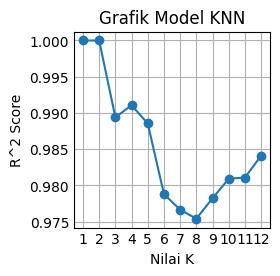

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# range nilai K yang akan diuji
k_range = range(1, 13)
r2_values = []

# uji nilai K
for k in k_range:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(train_x, train_y)
    predictions = model.predict(test_x)
    r2 = r2_score(test_y, predictions)
    r2_values.append(r2)
plt.plot(k_range, r2_values, marker='o')
plt.xlabel('Nilai K')
plt.ylabel('R^2 Score')
plt.title('Grafik Model KNN')
plt.xticks(k_range)
plt.show()


# **Kesimpulan**

Dari percobaan evaluasi akurasi model KNN dengan variasi jumlah tetangga terdekat yang digunakan (k), dapat dilihat bahwa dua model yang berbeda, yaitu nilai k=1 dan k=3, menunjukkan akurasi yang hampir sempurna, dengan k=1 mencapai 100% dan k=3 mencapai 98.94%. Namun, model dengan nilai k=9 menghasilkan akurasi yang sedikit lebih rendah, yaitu 97.82%. Dalam hal ini, k=3 memberikan performa yang baik dengan kompromi yang layak antara kompleksitas model dan akurasi. Dengan demikian, evaluasi tersebut mendukung judul "Implementasi Algoritma K-Nearest Neighbor (KNN) Untuk Klasifikasi Seleksi Penerima Beasiswa" dengan menunjukkan bahwa model KNN, khususnya dengan nilai model k=3, dapat efektif digunakan untuk memprediksi penerima beasiswa dengan tingkat akurasi yang tinggi dan kompleksitas model yang sesuai.